Import Library

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import keras.api.models as mod
import keras.api.layers as lay
from keras.api.optimizers import Adam

Generate Noisy wave

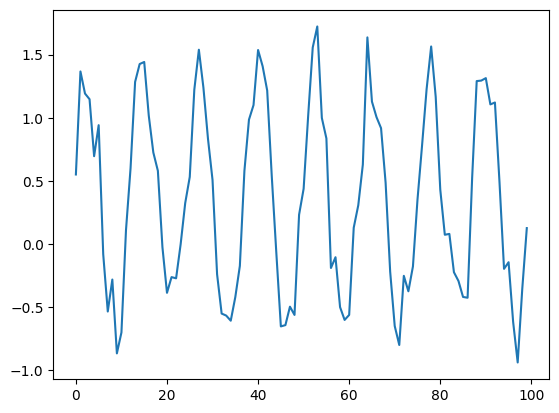

In [280]:
pitch = 20
step = 4
N = 100
n_train = int(N*0.7) # 70 % Train Data

def gen_data(x):
    return (x%pitch) / pitch

t = np.arange(1, N+1)
y = np.sin(0.05*t*10) + 0.8 * np.random.rand(N)
y = np.array(y)

plt.figure()
plt.plot(y)
plt.show()

<h1>Split Train and Test data</h1>

In [281]:
def convertToMatrix(data, step):
    X, Y = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d, ])
        Y.append(data[d, ])
    return np.array(X), np.array(Y)

train, test = y[0:n_train], y[n_train:N]

x_train, y_train = convertToMatrix(train, step)
x_test, y_test = convertToMatrix(test, step)

print("Dimension (Before)", train.shape, test.shape)
print("Dimension (AFTER)", x_train.shape, y_test.shape)

Dimension (Before) (70,) (30,)
Dimension (AFTER) (66, 4) (26,)


<h1>Train Model</h1>

Epoch 1/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.8065
Epoch 2/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.5668 
Epoch 3/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4700
Epoch 4/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.2948 
Epoch 5/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.2644 
Epoch 6/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.1657 
Epoch 7/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.1610 
Epoch 8/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.1245 
Epoch 9/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.1031 
Epoch 10/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.1025 
Epoch 11/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0801 
Epoch 12/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

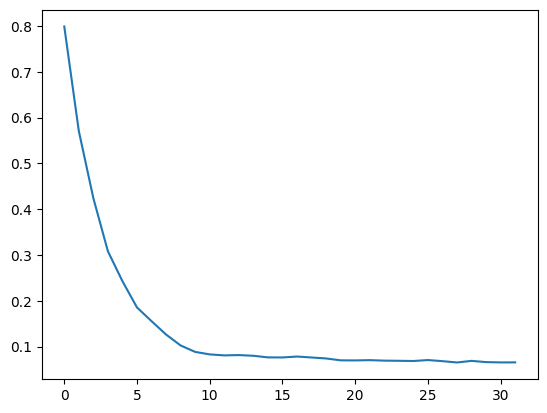

In [305]:
model = mod.Sequential()
model.add(lay.SimpleRNN(units=16,
                        input_shape=(step, 1),
                        activation="relu"))
model.add(lay.Dense(units=1))
optimizer = Adam(0.002)
model.compile(optimizer=optimizer, loss="mse", metrics=["accuracy"])
hist = model.fit(x_train, y_train, epochs=32, batch_size=16, verbose=1)

plt.plot(hist.history['loss'])
plt.show()

<h1>Prediction</h1>

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


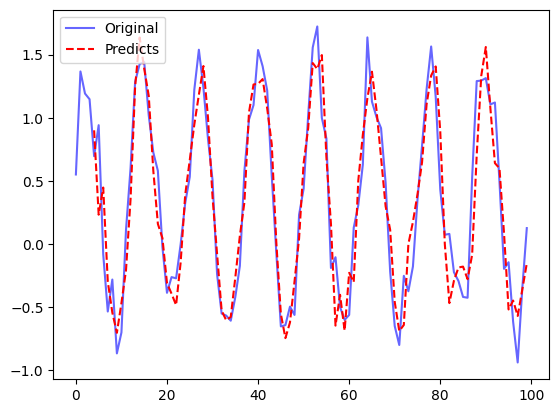

In [306]:

y_copy, _ = convertToMatrix(y, step)
predict = model.predict(y_copy)

time_pred = np.arange(step, len(y))        # Prediction take "step" inputs before predict

plt.plot(y, "b", label="Original", alpha=0.6)
plt.plot(time_pred, predict, "r--", label="Predicts")
plt.legend(loc="upper left")
plt.show()